In [1]:
pip --version

pip 23.2.1 from C:\Users\rampa\anaconda3\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
altair                        5.2.0
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat  

In [8]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
tf.__version__

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
1. Define problem 
2. Collect data
3. Hypothesis 
4. EDA - Pre-Processing 
5. Select Input / Output variable 
6. Split data (train-test) 
7. Feature Engineering (transfer /scal the data into readable form)
8. Select & import ML/DL algorithm (based on the output variable)
9. Create model for selected algorithm  
10. Train the model by training dataset 
11. Test the model by testing dataset 
12. Evaluate the model 
13. Deploye the model 

#### Problem statment: - Automatic loan prediction 
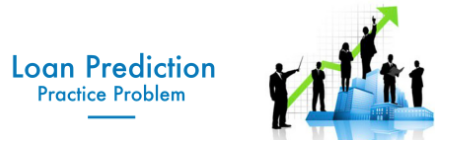

In [1]:
import pandas as pd
train = pd.read_csv('c:/Users/rampa/Downloads/train_ctrUa4K.csv') 


train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
train = train.dropna()

In [5]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [7]:
X = train[['Gender','Married','ApplicantIncome','LoanAmount','Credit_History']] 
y = train.Loan_Status

In [9]:
y

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object

In [10]:
print(X.shape)
print(y.shape)

(480, 5)
(480,)


In [11]:
X

,Gender,Married,ApplicantIncome,LoanAmount,Credit_History
1,Male,Yes,4583,128.0,1.0
2,Male,Yes,3000,66.0,1.0
3,Male,Yes,2583,120.0,1.0
4,Male,No,6000,141.0,1.0
5,Male,Yes,5417,267.0,1.0
...,...,...,...,...,...
609,Female,No,2900,71.0,1.0
610,Male,Yes,4106,40.0,1.0
611,Male,Yes,8072,253.0,1.0
612,Male,Yes,7583,187.0,1.0


In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoderX = LabelEncoder() 

X['Gender'] = labelencoderX.fit_transform(X['Gender']) 
X['Married'] = labelencoderX.fit_transform(X['Married']) 

C:\Users\rampa\AppData\Local\Temp\ipykernel_12820\1760564240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = labelencoderX.fit_transform(X['Gender'])
C:\Users\rampa\AppData\Local\Temp\ipykernel_12820\1760564240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Married'] = labelencoderX.fit_transform(X['Married'])


In [13]:

train.Loan_Status = labelencoderX.fit_transform(train.Loan_Status)

In [14]:
train.Loan_Status

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int32

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.2, random_state=7)

In [17]:
x_cv

,Gender,Married,ApplicantIncome,LoanAmount,Credit_History
153,1,1,2281,113.0,1.0
573,1,1,6125,187.0,1.0
578,1,1,1782,107.0,1.0
485,1,1,1958,131.0,1.0
388,1,1,2333,136.0,1.0
...,...,...,...,...,...
64,0,0,4166,116.0,0.0
529,1,0,6783,130.0,1.0
17,0,0,3510,76.0,0.0
603,1,0,3676,172.0,1.0


In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() 
x_train =sc.fit_transform(x_train) 


In [19]:
x_cv = sc.transform(x_cv)

In [21]:
## Build Artificial Neural Network 

import keras
from keras.models import Sequential
from keras.layers import Dense

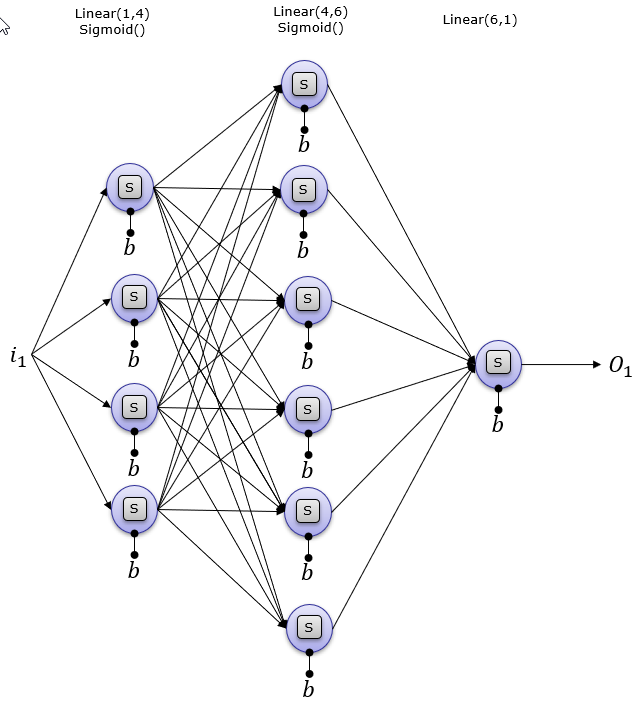 
ANN Components 
1. Input layer 
2. Hidden layer 
3. Output layer 

In [22]:
#created the model 
ann_model = Sequential()

In [23]:
#input layer - First Hidden layer 
ann_model.add(Dense(units=6, activation='relu', input_dim=5))

In [24]:
# Hidden layer 
ann_model.add(Dense(units=6, activation='relu'))

In [28]:
# output layer 
ann_model.add(Dense(units=1, activation='sigmoid'))

In [30]:
# Compile 

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
ann_model.fit(x_train,y_train, batch_size=10, epochs=100)

Epoch 1/100


UnimplementedError: Graph execution error:

Detected at node binary_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\rampa\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\rampa\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\rampa\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start

  File "C:\Users\rampa\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\rampa\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\rampa\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\rampa\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\rampa\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "C:\Users\rampa\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "C:\Users\rampa\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "C:\Users\rampa\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\rampa\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute

  File "C:\Users\rampa\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell

  File "C:\Users\rampa\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell

  File "C:\Users\rampa\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell

  File "C:\Users\rampa\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\rampa\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async

  File "C:\Users\rampa\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes

  File "C:\Users\rampa\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code

  File "C:\Users\rampa\AppData\Local\Temp\ipykernel_12820\868035115.py", line 1, in <module>

  File "C:\Users\rampa\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\rampa\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "C:\Users\rampa\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "C:\Users\rampa\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "C:\Users\rampa\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "C:\Users\rampa\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1127, in train_step

  File "C:\Users\rampa\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "C:\Users\rampa\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\rampa\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\rampa\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\rampa\anaconda3\Lib\site-packages\keras\src\losses.py", line 2521, in binary_crossentropy

Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_2327]

In [116]:
x_cv

array([[ 4.55573452e-01,  7.32120209e-01, -5.22151383e-01,
        -3.72084037e-01,  4.08868258e-01],
       [ 4.55573452e-01,  7.32120209e-01,  1.38235030e-01,
         5.72536707e-01,  4.08868258e-01],
       [ 4.55573452e-01,  7.32120209e-01, -6.07877923e-01,
        -4.48674908e-01,  4.08868258e-01],
       [ 4.55573452e-01,  7.32120209e-01, -5.77641708e-01,
        -1.42311423e-01,  4.08868258e-01],
       [ 4.55573452e-01,  7.32120209e-01, -5.13217956e-01,
        -7.84856974e-02,  4.08868258e-01],
       [ 4.55573452e-01,  7.32120209e-01,  1.16760446e-01,
         8.02309321e-01,  4.08868258e-01],
       [ 4.55573452e-01,  7.32120209e-01,  5.95767555e+00,
         5.84454167e+00, -2.44577558e+00],
       [ 4.55573452e-01,  7.32120209e-01, -1.23754897e-01,
        -8.82689844e-01,  4.08868258e-01],
       [ 4.55573452e-01,  7.32120209e-01, -4.35565859e-01,
        -4.10379472e-01,  4.08868258e-01],
       [ 4.55573452e-01, -1.36589591e+00, -6.36260612e-02,
        -2.18902294e-01

In [113]:
y_pred = ann_model.predict(x_cv)

3/3 [==============================] - 0s 2ms/step


In [114]:
y_pred = (y_pred>0.5)

In [115]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [117]:
# Evaluvate the model 

from sklearn.metrics import confusion_matrix, accuracy_score 

cm = confusion_matrix(y_cv,y_pred) 
print(cm) 
accuracy_score(y_cv,y_pred)

[[14 21]
 [ 1 60]]


0.7708333333333334

In [119]:
import pickle

pickle_out= open("ann_model.pkl" ,mode='wb') 

pickle.dump(ann_model, pickle_out)

pickle_out.close()

In [121]:
pip install -q pyngrok

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install -q streamlit_ace

In [122]:
%%writefile app.py
 
import pickle
import streamlit as st 

# loading the trained model
pickle_in = open('ann_model.pkl', 'rb') 
classifier = pickle.load(pickle_in)  


@st.cache()
  
# defining the function which will make the prediction using the data which the user inputs 
def prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History):   
 
    # Pre-processing user input    
    if Gender == "Male":
        Gender = 0
    else:
        Gender = 1
 
    if Married == "Unmarried":
        Married = 0
    else:
        Married = 1
 
    if Credit_History == "Unclear Debts":
        Credit_History = 0
    else:
        Credit_History = 1  
 
    LoanAmount = LoanAmount / 1000
 
    # Making predictions 
    prediction = classifier.predict( 
        [[Gender, Married, ApplicantIncome, LoanAmount, Credit_History]])
     
    if prediction == 0:
        pred = 'Rejected'
    else:
        pred = 'Approved'
    return pred


# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Streamlit Loan Prediction ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    Gender = st.selectbox('Gender',("Male","Female"))
    Married = st.selectbox('Marital Status',("Unmarried","Married")) 
    ApplicantIncome = st.number_input("Applicants monthly income") 
    LoanAmount = st.number_input("Total loan amount")
    Credit_History = st.selectbox('Credit_History',("Unclear Debts","No Unclear Debts"))
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History) 
        st.success('Your loan is {}'.format(result))
        print(LoanAmount)

if __name__=='__main__': 
    main()

Overwriting app.py


In [123]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

t=2023-10-31T19:30:27+0530 lvl=warn msg="ngrok config file found at legacy location, move to XDG location" xdg_path=C:\\Users\\rampa\\AppData\\Local/ngrok/ngrok.yml legacy_path=C:\\Users\\rampa\\.ngrok2\\ngrok.yml


<NgrokTunnel: "https://0725-2401-4900-1ce2-3ed3-6d33-4b19-9d0f-b34a.ngrok.io" -> "http://localhost:8501">